In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt
import warnings


from google.cloud import bigquery
import json
import base64
import db_dtypes
from datetime import datetime

import sys
sys.path.append('/Users/vgirao/Documents/utils')  

from functions import feature_analyze, plot_cross_matrix

# Ignorar todos os alertas
warnings.filterwarnings("ignore")
sns.set_palette("deep")

/Users/vgirao/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:34: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


In [2]:
df = pd.read_csv('FocosQueimasDia.csv', sep = ';')
df['data_pas'] = pd.to_datetime(df['data_pas'])
df.set_index('data_pas', inplace=True)


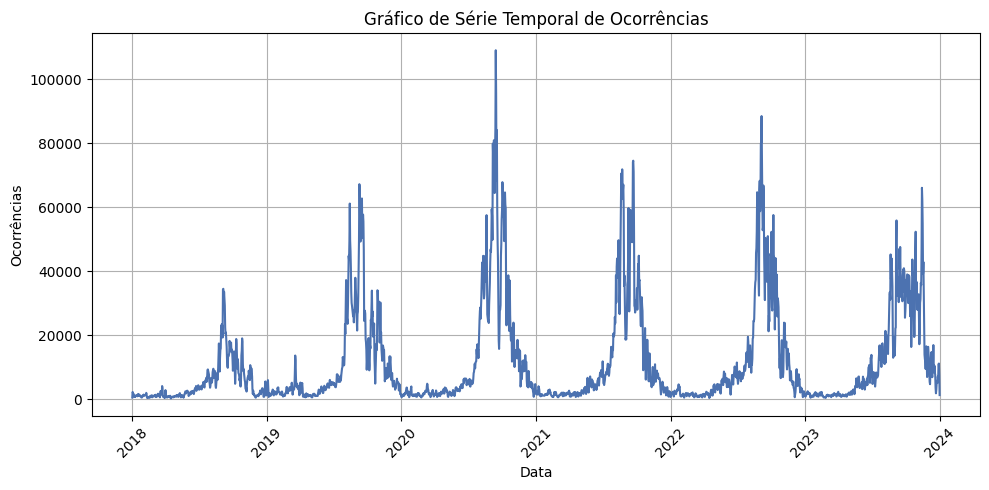

In [3]:


# Plotando o gráfico
plt.figure(figsize=(10, 5))
plt.plot(df.index, df['focos'])
plt.title('Gráfico de Série Temporal de Ocorrências')
plt.xlabel('Data')
plt.ylabel('Ocorrências')
plt.grid()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [6]:
df = pd.read_csv('dados1.csv')


In [36]:
df.columns

Index(['latitude', 'longitude', 'data_pas', 'satelite', 'pais', 'estado',
       'municipio', 'bioma', 'numero_dias_sem_chuva', 'precipitacao',
       'risco_fogo', 'id_area_industrial', 'frp'],
      dtype='object')

([<matplotlib.patches.Wedge at 0x144845400>,
 [Text(-1.0796164669549462, -0.21078017999736048, 'MATO GROSSO'),
  Text(0.10381495653208037, -1.0950901582975907, 'PARÁ'),
  Text(0.8746512418347534, -0.6670721139104258, 'MARANHÃO'),
  Text(1.0746596621975584, -0.23474797218598087, 'TOCANTINS'),
  Text(1.0852027270627311, 0.1798194682886471, 'MATO GROSSO DO SUL'),
  Text(0.19043417071764335, 1.0833904312957003, 'OUTROS')],
 [Text(-0.5888817092481524, -0.11497100727128752, '28.4%'),
  Text(0.05662633992658928, -0.5973219045259586, '18.5%'),
  Text(0.47708249554622906, -0.363857516678414, '7.7%'),
  Text(0.5861779975623045, -0.12804434846508048, '6.2%'),
  Text(0.591928760216035, 0.09808334633926204, '5.9%'),
  Text(0.10387318402780545, 0.5909402352522002, '33.3%')])

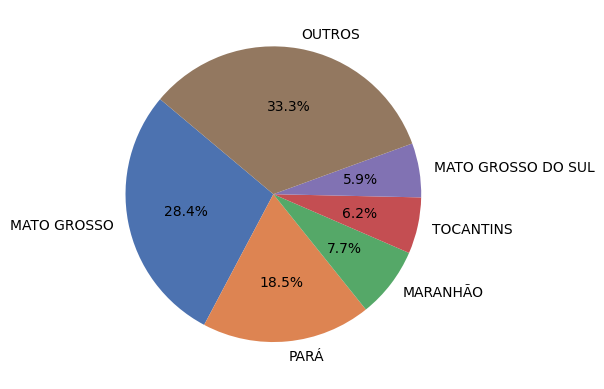

In [35]:
top5 = df['estado'].value_counts().head(5)

cinco = list(top5)

outros = df['estado'].shape[0] - sum(cinco)
cinco.append(outros)

top = list(df['estado'].value_counts().head(5).index)
top.append('OUTROS')


plt.pie(cinco, labels=top, autopct='%1.1f%%', startangle=140)

([<matplotlib.patches.Wedge at 0x1448b9160>,
 [Text(-0.8341401743233211, -0.7170844926365788, 'Amazônia'),
  Text(1.0957282900279937, -0.09684789327770067, 'Cerrado'),
  Text(0.29982299156993497, 1.0583506856075897, 'Pantanal'),
  Text(-0.37300899354709904, 1.034825729643876, 'Caatinga'),
  Text(-0.6951328370569781, 0.8525199932231015, 'Mata Atlântica'),
  Text(-0.8338223364438441, 0.7174540481782293, 'OUTROS')],
 [Text(-0.4549855496309024, -0.39113699598358836, '44.8%'),
  Text(0.5976699763789056, -0.052826123606018544, '29.8%'),
  Text(0.1635398135836009, 0.5772821921495943, '14.3%'),
  Text(-0.20345945102569035, 0.5644503979875687, '5.5%'),
  Text(-0.37916336566744263, 0.4650109053944189, '5.2%'),
  Text(-0.454812183514824, 0.3913385717335796, '0.4%')])

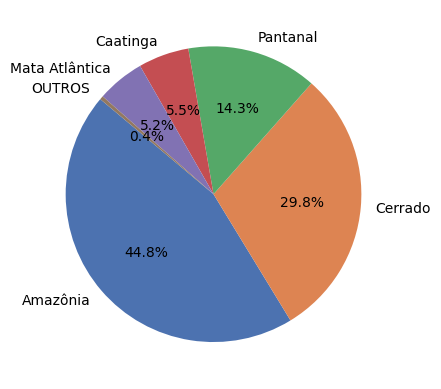

In [38]:
top5 = df['bioma'].value_counts().head(5)

cinco = list(top5)

outros = df['bioma'].shape[0] - sum(cinco)
cinco.append(outros)

top = list(df['bioma'].value_counts().head(5).index)
top.append('OUTROS')


plt.pie(cinco, labels=top, autopct='%1.1f%%', startangle=140)

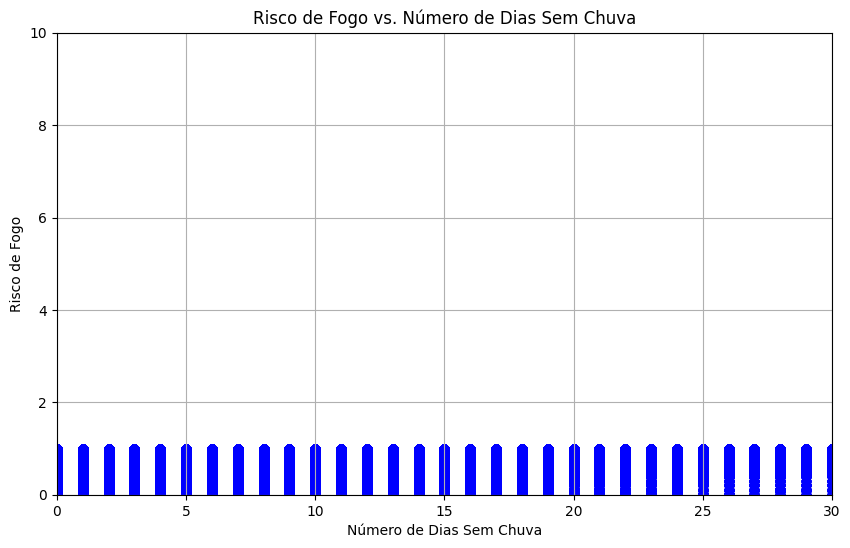

In [42]:
import matplotlib.pyplot as plt
import numpy as np

# Exemplo de dados


# Criar o gráfico de dispersão
plt.figure(figsize=(10, 6))
plt.scatter(df['numero_dias_sem_chuva'], df['risco_fogo'], alpha=0.5, color='b')
plt.title('Risco de Fogo vs. Número de Dias Sem Chuva')
plt.xlabel('Número de Dias Sem Chuva')
plt.ylabel('Risco de Fogo')
plt.grid(True)
plt.xlim(0, 30)  # Limitar eixo x de 0 a 30
plt.ylim(0, 10)  # Limitar eixo y de 0 a 10
plt.show()

Text(0.5, 1.0, 'Número de Dias Sem Chuva vs risco fogo')

<Figure size 1000x600 with 0 Axes>

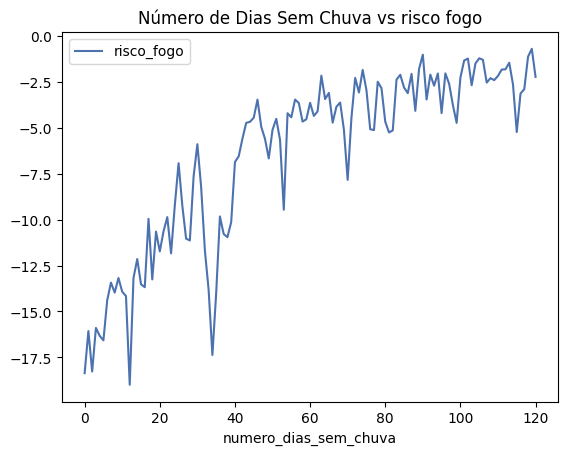

In [49]:
import matplotlib.pyplot as plt
import numpy as np

# Exemplo de dados
plt.figure(figsize=(10, 6))

pd.pivot_table(df[df['numero_dias_sem_chuva']>=0],
               index = 'numero_dias_sem_chuva',
               values= 'risco_fogo',
               aggfunc = np.mean).plot()

# Criar o gráfico de dispersão
# plt.scatter(df['numero_dias_sem_chuva'], df['risco_fogo'], alpha=0.5, color='b')
plt.title('Número de Dias Sem Chuva vs risco fogo')


# plt.xlabel('Número de Dias Sem Chuva')
# plt.ylabel('Risco de Fogo')
# plt.grid(True)
# plt.xlim(0, 30)  # Limitar eixo x de 0 a 30
# plt.ylim(0, 10)  # Limitar eixo y de 0 a 10
# plt.show()

Text(0.5, 1.0, 'Número de Dias Sem Chuva vs risco fogo')

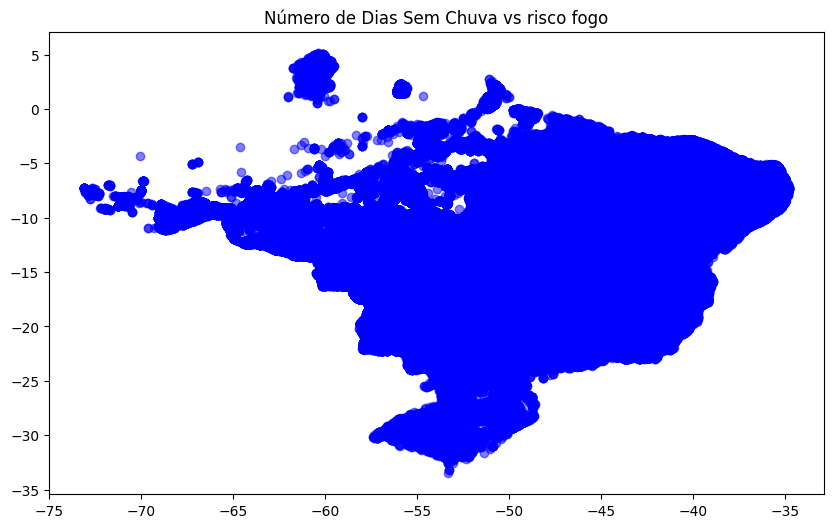

In [63]:
import matplotlib.pyplot as plt
import numpy as np

# Exemplo de dados
plt.figure(figsize=(10, 6))



p = pd.pivot_table(df,
               index = 'precipitacao',
               values= 'risco_fogo',
               aggfunc = np.mean)

dfi = df[df['risco_fogo']>0.9]

# Criar o gráfico de dispersão
plt.scatter(dfi['longitude'], dfi['latitude'], alpha=0.5, color='b')
plt.title('Número de Dias Sem Chuva vs risco fogo')


# plt.xlabel('Número de Dias Sem Chuva')
# plt.ylabel('Risco de Fogo')
# plt.grid(True)
# plt.xlim(0, 30)  # Limitar eixo x de 0 a 30
# plt.ylim(0, 10)  # Limitar eixo y de 0 a 10
# plt.show()

<Axes: >

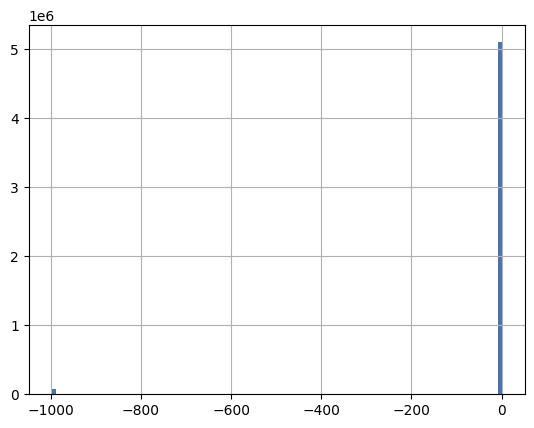

In [61]:
df['risco_fogo'].hist(bins = 100)

In [56]:
df

,latitude,longitude,data_pas,satelite,pais,estado,municipio,bioma,numero_dias_sem_chuva,precipitacao,risco_fogo,id_area_industrial,frp
0,-17.74963,-42.89283,2020-01-01 04:18:00,NPP-375D,Brasil,MINAS GERAIS,ITAMARANDIBA,Cerrado,5.0,8.0,0.1,0,2.5
1,-19.48211,-42.53120,2020-01-06 04:24:00,NPP-375D,Brasil,MINAS GERAIS,IPATINGA,Mata Atlântica,0.0,0.8,-999.0,220,1.6
2,-17.73322,-57.29283,2020-01-06 04:24:00,NPP-375D,Brasil,MATO GROSSO,POCONÉ,Pantanal,3.0,7.5,0.1,0,4.1
3,-17.73439,-57.28699,2020-01-06 04:24:00,NPP-375D,Brasil,MATO GROSSO,POCONÉ,Pantanal,3.0,7.3,0.1,0,2.8
4,-17.73462,-57.31151,2020-01-06 04:24:00,NPP-375D,Brasil,MATO GROSSO,POCONÉ,Pantanal,4.0,8.0,0.2,0,5.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5212985,-17.73982,-57.55719,2020-10-30 17:57:38,NOAA-20,Brasil,MATO GROSSO,POCONÉ,Pantanal,NaN,NaN,NaN,0,NaN
5212986,-17.69369,-57.65010,2020-10-30 17:57:38,NOAA-20,Brasil,MATO GROSSO,POCONÉ,Pantanal,NaN,NaN,NaN,0,NaN
5212987,-16.61952,-57.23793,2020-10-30 17:57:38,NOAA-20,Brasil,MATO GROSSO,POCONÉ,Pantanal,NaN,NaN,NaN,0,NaN
5212988,-17.49643,-57.37136,2020-10-30 17:57:38,NOAA-20,Brasil,MATO GROSSO,POCONÉ,Pantanal,NaN,NaN,NaN,0,NaN
